# Keyword extraction using text mining


Extract keywords on a fitness brand to understand what people mention frequently about the brand

Visualise the keywords using word clouds and bar plots

In [1]:
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('tweet_curefit.csv')


In [5]:
df.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,796287855496556545,1267346697803321344,2020-06-01T06:46:13Z,GokuYadav,We are adding pause days to your membership.\n...,Twitter for Android,104,NaN,NaN,NaN,...,1917,3955,2016-11-09T09:46:33Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/79628785...,NaN,http://pbs.twimg.com/profile_images/1252467545...
1,1248641934995771394,1267344194831437825,2020-06-01T06:36:16Z,naifabdulkhader,Today I really had a dance fitness with @Roymo...,Twitter for iPhone,140,NaN,NaN,NaN,...,78,56,2020-04-10T16:00:24Z,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1248642131...
2,1248641934995771394,1264599467413475328,2020-05-24T16:49:42Z,naifabdulkhader,@BeCureFit My both glutes are heavily sored to...,Twitter for iPhone,97,1.264379e+18,3.187963e+09,BeCureFit,...,78,56,2020-04-10T16:00:24Z,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1248642131...
3,1248641934995771394,1266644798347206657,2020-05-30T08:17:07Z,naifabdulkhader,@BeCureFit @jrtrackqueen 😱,Twitter for iPhone,1,1.266639e+18,3.187963e+09,BeCureFit,...,78,56,2020-04-10T16:00:24Z,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1248642131...
4,1248641934995771394,1267200235979198465,2020-05-31T21:04:14Z,naifabdulkhader,Completed a RELAXING lower body circuit WO wit...,Twitter for iPhone,277,NaN,NaN,NaN,...,78,56,2020-04-10T16:00:24Z,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1248642131...


In [7]:
df.shape

(1700, 90)

In [8]:
import nltk
#nltk.download()
from nltk.stem.wordnet import WordNetLemmatizer 

In [9]:
df['text'] = df['text'].astype('str')


In [10]:
#remove stopwords
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
#Adding custom stop words
new_words=[]
new_words = ["some","one","like","time","br","could","good",'even', 'get', 'would',
             'make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 'bad', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many',
            'http','co', 'becurefit', 'curefit', 'dcwctu','http','going']
stop_words = stop_words.union(new_words)

Perform text pre-processing in a loop for the whole corpus


In [13]:
corpus = []
for i in range(0, df.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [14]:
corpus[300]


'rz amir awesome sure top coming day bebettereveryday'

# Create a vocabulary of words


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [16]:
#ignore words that appear in 80% of documents, 
#eliminate stop words
cv = CountVectorizer(max_df=0.8,
                    stop_words=stop_words,
                    ngram_range=(1,3))

X = cv.fit_transform(corpus)

# Visualising frequently occuring words


In [17]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(max_df=0.7,
                          stop_words=stop_words, 
                          ngram_range=(1,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

In [19]:
### This df used as a guideline to create custom stop words
top_df.head(20)

,Word,Freq
0,app,409
1,live,311
2,workout,309
3,bebettereveryday,303
4,hrxbrand,289
5,keep,243
6,home,237
7,usa,231
8,stay,196
9,available,187


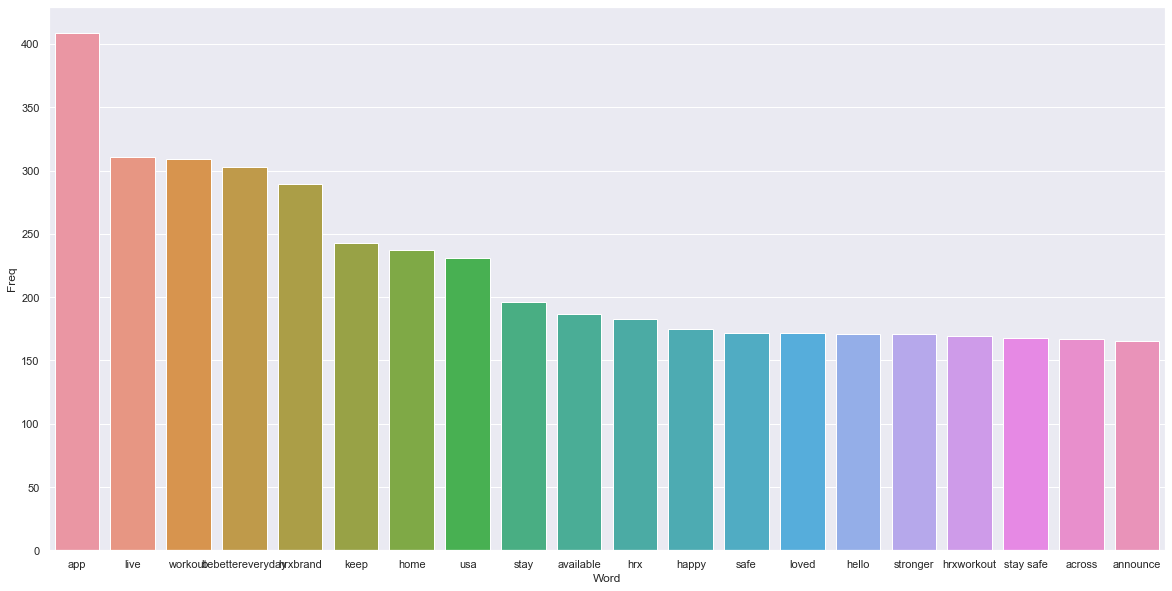

In [20]:
#Barplot of most freq words
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Freq",data=top_df)
plt.show()

In [21]:
#Visualise using word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


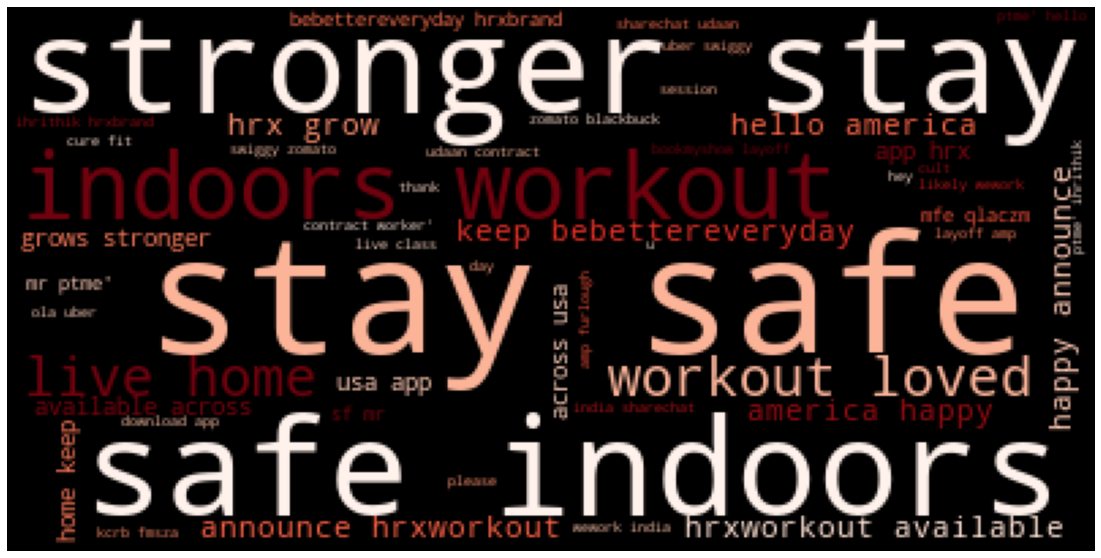

In [22]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='black',
                     colormap='Reds',
                     stopwords=stop_words,
                     max_words=50,
                     max_font_size=60,
                     random_state=420).generate(str(corpus))



print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# TF IDF Vectorizer


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
## Applying tf-idf vectoriser to the corpus
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the tf-idf model
tfv = TfidfVectorizer(stop_words=stop_words,
                     ngram_range=(1,3),
                     min_df=0.001)

In [25]:
# tokenize and build vocab
tfmat = tfv.fit_transform(corpus)

In [26]:
feature_names=tfv.get_feature_names()
feature_names

['aa',
 'aajtak',
 'ab',
 'abdevilliers',
 'able',
 'able access',
 'able access live',
 'able address',
 'able address concern',
 'able book',
 'able cast',
 'able cast using',
 'able work',
 'able work home',
 'absolute',
 'absolutely',
 'accel',
 'accel india',
 'accel india esm',
 'access',
 'access live',
 'access live fitness',
 'accordingly',
 'accordingly meanwhile',
 'accordingly meanwhile check',
 'account',
 'achieving',
 'achieving fit',
 'achieving fit wearecult',
 'acquired',
 'acquired company',
 'acquired company fitness',
 'acquired secondary',
 'acquired secondary raoutdmi',
 'acquisition',
 'acquisition company',
 'acquisition company poured',
 'across',
 'across sector',
 'across sector gym',
 'across usa',
 'across usa app',
 'act',
 'acted',
 'action',
 'action reply',
 'action reply message',
 'action taken',
 'actioncovidteam',
 'actioncovidteam dvbydt',
 'actioncovidteam dvbydt prinsciadvgoi',
 'activate',
 'active',
 'active life',
 'active life dcjammuofficia

In [27]:
len(feature_names)


4929

In [28]:
#Remove sparsity
dense = tfmat.todense()

In [29]:
#Convert the matrix to a list
corpus1 = dense[0].tolist()[0]

In [30]:
#Create a list of feature number and tf idf score - using pair iteration in list
phrase_scores = [pair for pair in zip(range(0, len(corpus1)), corpus1) if pair[1] > 0]
phrase_scores

[(77, 0.30184877163669954),
 (78, 0.32484336560856825),
 (79, 0.32484336560856825),
 (1146, 0.20617797733002594),
 (1160, 0.3193600186504225),
 (1161, 0.33097322598610357),
 (2670, 0.2235710775030308),
 (2812, 0.23355778805965188),
 (2817, 0.3193600186504225),
 (3199, 0.24721218489428906),
 (3200, 0.26577485475863283),
 (3204, 0.32484336560856825)]

In [31]:
#Sort by second item in list - -1 for descending order
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
#sorted_phrase_scores

In [32]:
#Get word instead of word id with score
for phrase, score in [(feature_names[word_id], score) 
                      for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <25} {1}'.format(phrase, score))

day membership lockdown   0.33097322598610357
adding pause              0.32484336560856825
adding pause day          0.32484336560856825
pause day membership      0.32484336560856825
day membership            0.3193600186504225
membership lockdown       0.3193600186504225
adding                    0.30184877163669954
pause day                 0.26577485475863283
pause                     0.24721218489428906
membership                0.23355778805965188
lockdown                  0.2235710775030308
day                       0.20617797733002594
